<a href="https://colab.research.google.com/github/Th3Mayar/embeddings_practice/blob/main/embeddings_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Exercises

## Generation and visualization of embeddings.
## Implementation of a simple semantic search system.

### Materials and Resources

#### Required Libraries:

```
!pip install gensim spacy transformers matplotlib seaborn sklearn
```

#### Example Dataset:
We will use the "Text8" text corpus to train and visualize embeddings. This dataset can be downloaded from gensim.

### 1. Theory of Embeddings

**What are Embeddings?**
Embeddings are dense and low-dimensional representations of words, phrases, or documents. They capture semantic similarities between words based on the context in which they appear.

**Why are they important?**
They enable machines to understand text more efficiently and accurately, facilitating tasks such as classification, translation, and text generation.

**Types of Embeddings:**
- **Word2Vec**: A model that learns word representations through contexts.
- **GloVe**: A model based on global word counts.
- **FastText**: An extension of Word2Vec that considers sub-words.


In [1]:
!pip install gensim spacy transformers matplotlib seaborn sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


### 2. Generation of Embeddings

#### Using Word2Vec with Gensim:

In [2]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Train the Word2Vec model
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get the vector of a word
vector = model.wv['computer']
print(vector)

[-0.00515774 -0.00667028 -0.0077791   0.00831315 -0.00198292 -0.00685696
 -0.0041556   0.00514562 -0.00286997 -0.00375075  0.0016219  -0.0027771
 -0.00158482  0.0010748  -0.00297881  0.00852176  0.00391207 -0.00996176
  0.00626142 -0.00675622  0.00076966  0.00440552 -0.00510486 -0.00211128
  0.00809783 -0.00424503 -0.00763848  0.00926061 -0.00215612 -0.00472081
  0.00857329  0.00428459  0.0043261   0.00928722 -0.00845554  0.00525685
  0.00203994  0.0041895   0.00169839  0.00446543  0.0044876   0.0061063
 -0.00320303 -0.00457706 -0.00042664  0.00253447 -0.00326412  0.00605948
  0.00415534  0.00776685  0.00257002  0.00811905 -0.00138761  0.00808028
  0.0037181  -0.00804967 -0.00393476 -0.0024726   0.00489447 -0.00087241
 -0.00283173  0.00783599  0.00932561 -0.0016154  -0.00516075 -0.00470313
 -0.00484746 -0.00960562  0.00137242 -0.00422615  0.00252744  0.00561612
 -0.00406709 -0.00959937  0.00154715 -0.00670207  0.0024959  -0.00378173
  0.00708048  0.00064041  0.00356198 -0.00273993 -0.0

#### Using BERT with Transformers:

In [3]:
from transformers import BertModel, BertTokenizer
import torch

# Load the BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize a sentence
inputs = tokenizer("Hello, my name is Bert", return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    outputs = model(**inputs)

# The embeddings are in `outputs.last_hidden_state`
embeddings = outputs.last_hidden_state
print(embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tensor([[[ 0.0933,  0.6789, -0.2839,  ..., -0.1260, -0.0460,  0.8272],
         [ 0.3036,  0.1872, -0.0033,  ...,  0.1576,  0.9007,  0.3210],
         [-0.4531,  0.5814,  0.2029,  ..., -0.5397,  0.4038,  0.4373],
         ...,
         [-0.4124,  0.3710,  0.3747,  ..., -0.7111,  0.0360,  0.9823],
         [-0.2375,  0.0728,  0.2904,  ...,  0.5029,  0.4619, -0.2166],
         [ 0.8143,  0.0527, -0.4675,  ...,  0.1241, -0.6431, -0.2325]]])


### 3. Visualization of Embeddings

Reduce dimensionality with PCA and visualize with Matplotlib:

[==================================================] 100.0% 31.6/31.6MB downloaded


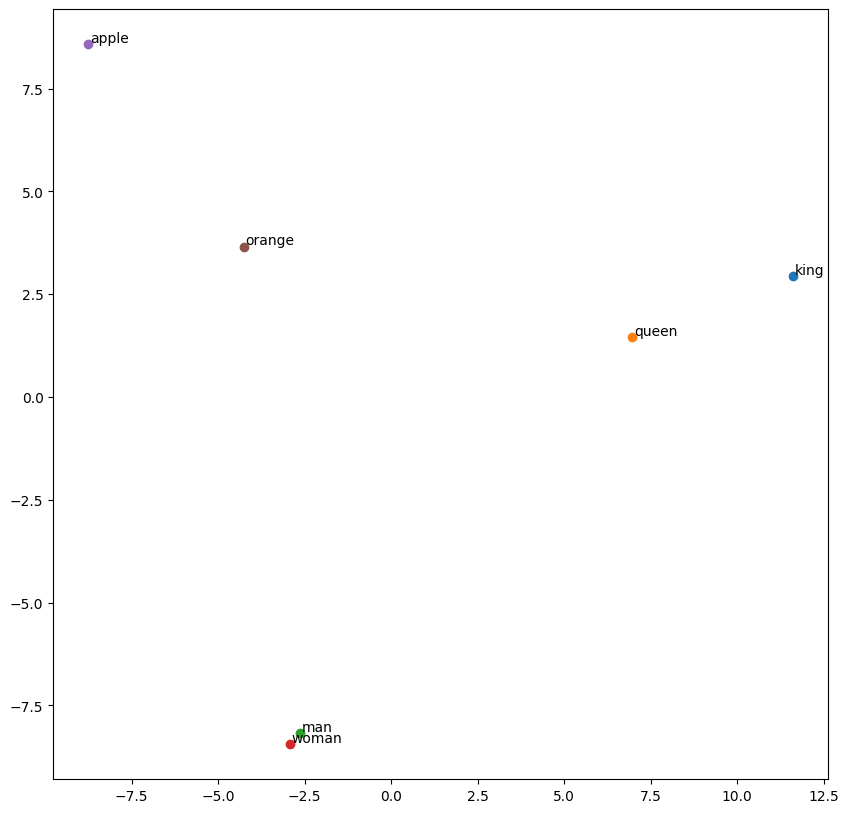

In [4]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el corpus de texto `text8`
corpus = api.load('text8')

# Entrenar el modelo Word2Vec con el corpus `text8`
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Comprobar las palabras en el vocabulario
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange']
words_in_vocab = [word for word in words if word in model.wv]

if not words_in_vocab:
    raise ValueError("None of the specified words are in the model vocabulary.")

word_vectors = [model.wv[word] for word in words_in_vocab]

# Reducir la dimensionalidad
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Visualizar
plt.figure(figsize=(10, 10))
for word, vector in zip(words_in_vocab, word_vectors_pca):
    plt.scatter(vector[0], vector[1])
    plt.text(vector[0] + 0.05, vector[1] + 0.05, word)
plt.show()

In [5]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Entrenar el modelo Word2Vec con un corpus de ejemplo
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

def most_similar(word, top_n=5):
    # Check if the word is in the vocabulary before proceeding
    if word in model.wv:
        return model.wv.most_similar(word, topn=top_n)
    else:
        return f"The word '{word}' is not in the model's vocabulary."

# Ejemplo de búsqueda
print(most_similar('king'))  # You might want to try a different word that's likely in the vocabulary

The word 'king' is not in the model's vocabulary.


### 4. Practical Applications

#### Semantic Search:

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Dataset de ejemplo
texts = ["I love programming", "Python is great", "I dislike bugs", "Debugging is fun"]
labels = [1, 1, 0, 0]

# Convertir texto a TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Entrenar un clasificador
clf = LogisticRegression()
clf.fit(X, labels)

# Predecir
print(clf.predict(vectorizer.transform(["I love debugging"])))

[1]
